In [152]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [153]:
img=cv2.imread(r'C:/Users/jithi/Desktop/lanes.jpg')

In [154]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [155]:
def show(img):
    plt.imshow(img)
    #plt.axis('off')
    plt.show()

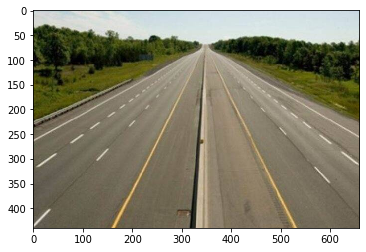

In [156]:
show(img)

In [157]:
img.shape

(440, 660, 3)

In [158]:
height=img.shape[0]
width=img.shape[1]

In [159]:
pts=[(0, height), (width/2, height/2), (width, height)]

In [160]:
def roi(img, pts):
    mask=np.zeros_like(img)
    cv2.fillPoly(mask, [pts], (255,255,255))
    show(mask)
    mask_img=cv2.bitwise_and(img, mask)
    return mask_img
    

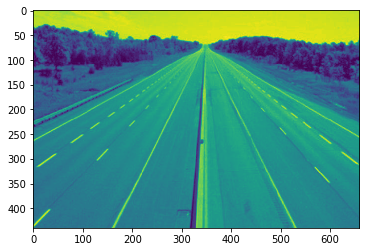

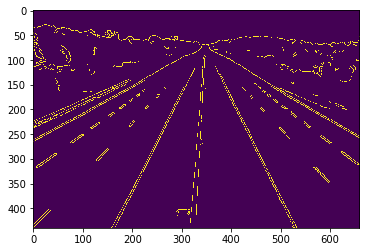

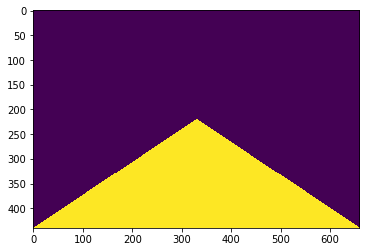

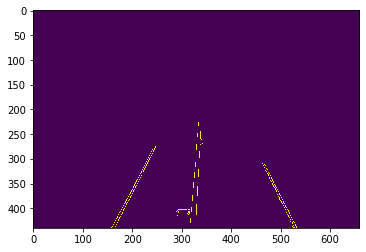

In [161]:
gray_img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show(gray_img)
canny_img=cv2.Canny(gray_img, 100, 200)
show(canny_img)
crop_img=roi(canny_img, np.array(pts, np.int32))
show(crop_img)

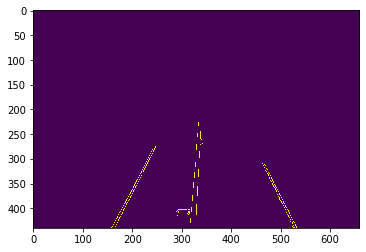

In [162]:
show(crop_img)

In [195]:
lines=cv2.HoughLinesP(crop_img, 3, np.pi/60, 200, minLineLength=25, maxLineGap=10)
print(lines)

[[[165 439 248 275]]

 [[159 438 189 380]]

 [[328 439 336 285]]]


In [196]:
def draw_line(img, lines):
    img=np.copy(img)
    blank_image=np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for (x1, y1, x2, y2) in lines[0]:
        cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=3)
    img=cv2.addWeighted(img, .8, blank_image, 1, 0.0)
    return img
            

In [197]:
image_with_lines=draw_line(img, lines)

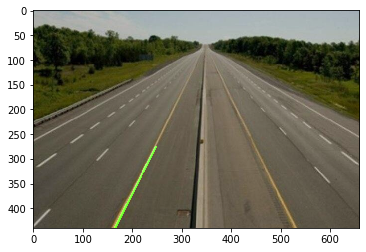

In [198]:
show(image_with_lines)